Stifler density over k-core

In [6]:
import csv

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, isdir, join, exists

In [22]:
mypath = '../../log/EmailEUCore'
dirs = [f for f in listdir(mypath) if isdir(join(mypath,f))]
kcores = [join(join(mypath, f),'k_core.csv') for f in dirs]
rawdensities = []
N_AGENTS = 77
kcores

['../../log/EmailEUCore/2019_11_01_14_57_07/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_15_01_18/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_55_37/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_59_29/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_15_01_38/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_57_54/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_55_16/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_59_05/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_55_58/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_15_00_57/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_58_19/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_58_41/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_56_42/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_56_19/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_57_30/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_54_28/k_core.csv',
 '../../log/EmailEUCore/2019_11_01_14_59_51/k_core.csv',
 '../../log/EmailEUCore/2019_11

read all files. skip intestation rows, create an array of raw data, [k-core, stifler-density]

In [25]:
rawdensities = []
for index, filename in enumerate(kcores):
    s_den = 0
    #i_den = 0
    #r_den = 0
    k_core = 0
    with open(filename, 'r') as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            if len(row) < 4:
                continue
            try:
                int(row[0])
            except:
                continue
            if int(row[0]) == 1 and row[3] == 'i':
                k_core = int(row[2])
            if row[3] == 's':
                s_den += 1
    s_den /= N_AGENTS
    rawdensities.append([k_core, s_den]) 
rawdensities = np.array(rawdensities)

Text(0.5, 0, 'k-core')

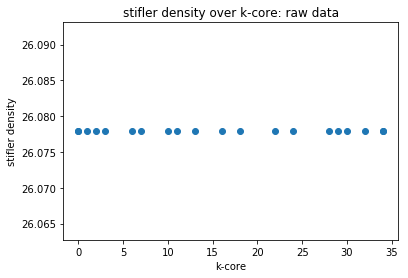

In [29]:
x,y = rawdensities.T
plt.scatter(x,y)
plt.title("stifler density over k-core: raw data")
plt.ylabel("stifler density")
plt.xlabel("k-core")

/home/nik/.pyenv/versions/3.6.3/envs/memoryjupyter/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/nik/.pyenv/versions/3.6.3/envs/memoryjupyter/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/nik/.pyenv/versions/3.6.3/envs/memoryjupyter/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/nik/.pyenv/versions/3.6.3/envs/memoryjupyter/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/nik/.pyenv/versions/3.6.3/envs/memoryjupyter/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'k-core')

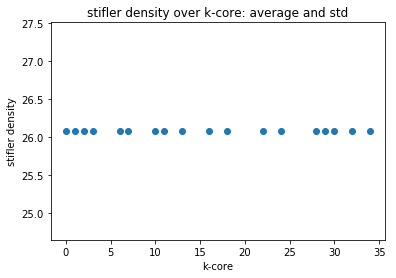

In [28]:
cleanlist = []
for i in range(int(max([el[0] for el in np.sort(rawdensities, axis=0)])) + 1):
    sublist = [el[1] for el in rawdensities if int(el[0]) == i ]
    cleanlist.append([i,
        np.mean(sublist),
        np.std(sublist)]
    )
    sublist = []
x,y,e = np.array([el for el in cleanlist if ~np.isnan(el[1])]).T
plt.figure()
plt.errorbar(x,y, yerr=e, fmt='o')
plt.title("stifler density over k-core: average and std")
plt.ylabel("stifler density")
plt.xlabel("k-core")

In [156]:
kcores

['../../log/EmailEUCore/2019_10_01_17_49_26/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_08_15/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_17_50_13/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_13_14/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_09_18/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_17_53_10/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_17_49_48/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_10_23/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_17_51_36/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_04_54/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_12_53/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_17_52_22/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_12_31/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_17_48_11/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_08_58/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_18_12_09/k_core.csv',
 '../../log/EmailEUCore/2019_10_01_17_40_46/k_core.csv',
 '../../log/EmailEUCore/2019_10

In [31]:
kcoredict

{'9': [0, 0, 0],
 '3': [0, 0, 0],
 '7': [0, 0, 0],
 '6': [0, 0, 0],
 '1': [0, 0, 0],
 '8': [0, 0, 0],
 '2': [0, 0, 0]}